In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('pokemon.csv')

In [8]:
df = df[df['generation']==1]

In [9]:
df

abilities  against_bug  against_dark  against_dragon  \
0      ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1      ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2      ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3         ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4         ['Blaze', 'Solar Power']          0.5           1.0             1.0   
..                             ...          ...           ...             ...   
146  ['Shed Skin', 'Marvel Scale']          1.0           1.0             2.0   
147  ['Shed Skin', 'Marvel Scale']          1.0           1.0             2.0   
148  ['Inner Focus', 'Multiscale']          0.5           1.0             2.0   
149        ['Pressure', 'Unnerve']          2.0           2.0             1.0   
150                ['Synchronize']          2.0           2.0             1.0   

     against_electric  against_fairy  against_fight  against_fire  \
0                 0.5            0.5            0.5           2.0   
1                 0.5            0.5            0.5           2.0   
2                 0.5            0.5            0.5           2.0   
3                 1.0            0.5            1.0           0.5   
4                 1.0            0.5            1.0           0.5   
..                ...            ...            ...           ...   
146               0.5            2.0            1.0           0.5   
147               0.5            2.0            1.0           0.5   
148               1.0            2.0            0.5           0.5   
149               1.0            1.0            0.5           1.0   
150               1.0            1.0            0.5           1.0   

     against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0               2.0            1.0  ...             88.1               1   
1               2.0            1.0  ...             88.1               2   
2               2.0            1.0  ...             88.1               3   
3               1.0            1.0  ...             88.1               4   
4               1.0            1.0  ...             88.1               5   
..              ...            ...  ...              ...             ...   
146             1.0            1.0  ...             50.0             147   
147             1.0            1.0  ...             50.0             148   
148             1.0            1.0  ...             50.0             149   
149             1.0            2.0  ...              NaN             150   
150             1.0            2.0  ...              NaN             151   

     sp_attack  sp_defense  speed    type1   type2  weight_kg  generation  \
0           65          65     45    grass  poison        6.9           1   
1           80          80     60    grass  poison       13.0           1   
2          122         120     80    grass  poison      100.0           1   
3           60          50     65     fire     NaN        8.5           1   
4           80          65     80     fire     NaN       19.0           1   
..         ...         ...    ...      ...     ...        ...         ...   
146         50          50     50   dragon     NaN        3.3           1   
147         70          70     70   dragon     NaN       16.5           1   
148        100         100     80   dragon  flying      210.0           1   
149        194         120    140  psychic     NaN      122.0           1   
150        100         100    100  psychic     NaN        4.0           1   

     is_legendary  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
146             0  
147             0  
148             0  
149             1  
150             1  

[151 rows x 41 columns]

In [10]:
type1_counts = df.groupby('type1').count()['name']
type2_counts = df.groupby('type2').count()['name']

In [11]:
type_dict = {'type1':type1_counts,'type2':type2_counts}
type_counts = pd.DataFrame(type_dict).fillna(0)
type_counts

type1  type2
bug        12.0    0.0
dark        0.0    4.0
dragon      3.0    0.0
electric    9.0    1.0
fairy       2.0    3.0
fighting    7.0    1.0
fire       12.0    1.0
flying      0.0   19.0
ghost       3.0    0.0
grass      12.0    2.0
ground      8.0    8.0
ice         2.0    7.0
normal     22.0    0.0
poison     14.0   21.0
psychic     8.0    6.0
rock        9.0    2.0
steel       0.0    2.0
water      28.0    4.0

<Figure size 432x288 with 0 Axes>

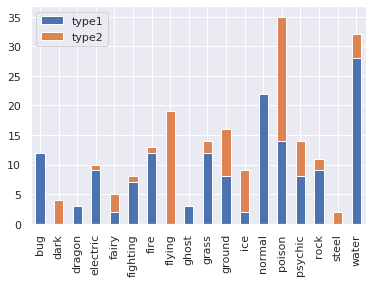

In [12]:
#todo.. sort by most to least common
plt.close('all')
plt.figure()
type_counts.plot.bar(stacked=True)

In [13]:
df[df['type2']=='water'][['name','type1','type2']]

name type1  type2
137   Omanyte  rock  water
138   Omastar  rock  water
139    Kabuto  rock  water
140  Kabutops  rock  water

In [14]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))  

<Figure size 432x288 with 0 Axes>

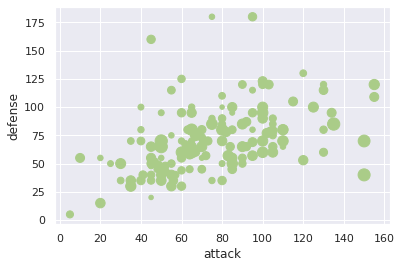

In [15]:
plt.close('all')
plt.figure()
df.plot.scatter(x='attack',y='defense',s=df['speed'],c='#aacc88')

<Figure size 432x288 with 0 Axes>

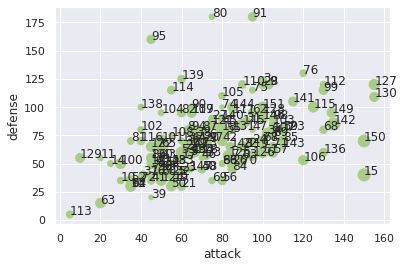

In [16]:
plt.close('all')
plt.figure()
ax = df.plot.scatter(x='attack',y='defense',s=df['speed'],c='#aacc88')
label_point(df['attack'], df['defense'], df['pokedex_number'], ax)

In [17]:
df[df.pokedex_number == 127][['name', 'abilities', 'attack', 'defense', 'type1', 'type2']]

name                                  abilities  attack  defense type1  \
126  Pinsir  ['Hyper Cutter', 'Mold Breaker', 'Moxie']     155      120   bug   

    type2  
126   NaN

In [18]:
tmp1 = df.loc[df.pokedex_number == 127, 'attack']
tmp1_name = df[df.pokedex_number == 127].iloc[0]['name']
tmp2 = df.loc[df.pokedex_number == 91, 'attack']
tmp2_name = df[df.pokedex_number == 91].iloc[0]['name']
tmp_dict = {tmp1_name: tmp1, tmp2_name: tmp2}
df_tmp = pd.DataFrame(tmp_dict)

<Figure size 432x288 with 0 Axes>

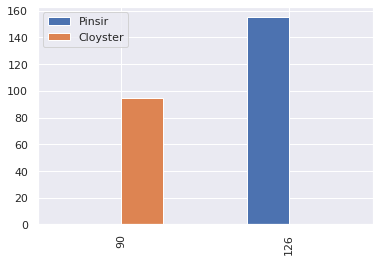

In [19]:
#todo.. sort by most to least common
plt.close('all')
plt.figure()
df_tmp.plot.bar()

In [20]:
type1_filter = ['fire', 'rock', 'grass', 'bug']
type2_filter = ['water', 'poison']
filter_and = ((df.type1.isin(type1_filter)) &
              (df.type2.isin(type2_filter)))
filter_or = ((df.type1.isin(type1_filter)) |
             (df.type2.isin(type2_filter)))

In [21]:
df[filter_and][['name', 'type1', 'type2']]
#[filter_and][['name', 'type1', 'type2']]

name  type1   type2
0     Bulbasaur  grass  poison
1       Ivysaur  grass  poison
2      Venusaur  grass  poison
12       Weedle    bug  poison
13       Kakuna    bug  poison
14     Beedrill    bug  poison
42       Oddish  grass  poison
43        Gloom  grass  poison
44    Vileplume  grass  poison
47      Venonat    bug  poison
48     Venomoth    bug  poison
68   Bellsprout  grass  poison
69   Weepinbell  grass  poison
70   Victreebel  grass  poison
137     Omanyte   rock   water
138     Omastar   rock   water
139      Kabuto   rock   water
140    Kabutops   rock   water

<Figure size 432x288 with 0 Axes>

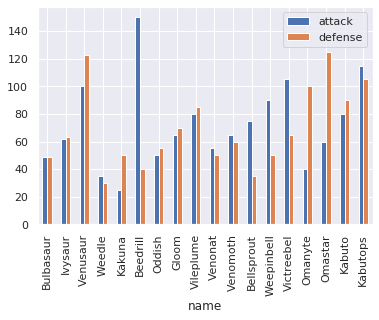

In [22]:
plt.close('all')
plt.figure()
df[filter_and].plot.bar(x='name', y=['attack', 'defense'])

In [23]:
df[filter_or][['name', 'type1', 'type2']]

name   type1    type2
0     Bulbasaur   grass   poison
1       Ivysaur   grass   poison
2      Venusaur   grass   poison
3    Charmander    fire      NaN
4    Charmeleon    fire      NaN
5     Charizard    fire   flying
9      Caterpie     bug      NaN
10      Metapod     bug      NaN
11   Butterfree     bug   flying
12       Weedle     bug   poison
13       Kakuna     bug   poison
14     Beedrill     bug   poison
36       Vulpix    fire      ice
37    Ninetales    fire      ice
42       Oddish   grass   poison
43        Gloom   grass   poison
44    Vileplume   grass   poison
45        Paras     bug    grass
46     Parasect     bug    grass
47      Venonat     bug   poison
48     Venomoth     bug   poison
57    Growlithe    fire      NaN
58     Arcanine    fire      NaN
68   Bellsprout   grass   poison
69   Weepinbell   grass   poison
70   Victreebel   grass   poison
71    Tentacool   water   poison
72   Tentacruel   water   poison
73      Geodude    rock   ground
74     Graveler    rock   ground
75        Golem    rock   ground
76       Ponyta    fire      NaN
77     Rapidash    fire      NaN
87       Grimer  poison   poison
88          Muk  poison   poison
91       Gastly   ghost   poison
92      Haunter   ghost   poison
93       Gengar   ghost   poison
94         Onix    rock   ground
101   Exeggcute   grass  psychic
102   Exeggutor   grass  psychic
113     Tangela   grass      NaN
122     Scyther     bug   flying
125      Magmar    fire      NaN
126      Pinsir     bug      NaN
135     Flareon    fire      NaN
137     Omanyte    rock    water
138     Omastar    rock    water
139      Kabuto    rock    water
140    Kabutops    rock    water
141  Aerodactyl    rock   flying
145     Moltres    fire   flying

<Figure size 432x288 with 0 Axes>

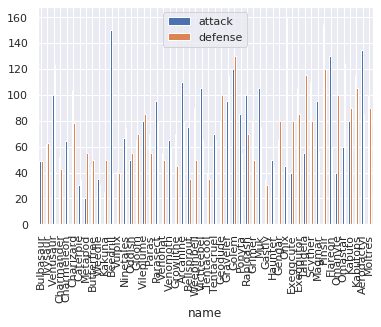

In [24]:
plt.close('all')
plt.figure()
df[filter_or].plot.bar(x='name', y=['attack', 'defense'])

<Figure size 432x288 with 0 Axes>

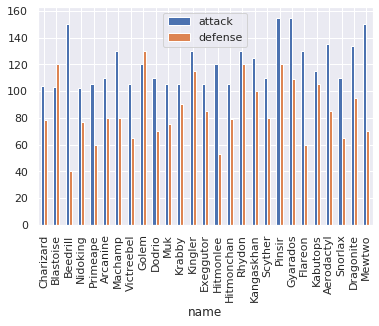

In [25]:
plt.close('all')
plt.figure()
df[df.attack > 100].plot.bar(x='name', y=['attack', 'defense'])

In [26]:
ad_ratios = pd.DataFrame({'ad_ratio': df.attack / df.defense,
                          'name': df.name,
                          'attack': df.attack,
                          'defense': df.defense})

<Figure size 432x288 with 0 Axes>

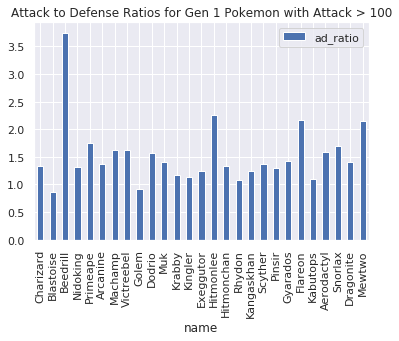

In [27]:
plt.close('all')
plt.figure()
ad_ratios[df.attack > 100].plot.bar(title='Attack to Defense Ratios for Gen 1 Pokemon with Attack > 100',
                                    x='name',
                                    y='ad_ratio')

In [28]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [29]:
df['abilities'].head()

0    ['Overgrow', 'Chlorophyll']
1    ['Overgrow', 'Chlorophyll']
2    ['Overgrow', 'Chlorophyll']
3       ['Blaze', 'Solar Power']
4       ['Blaze', 'Solar Power']
Name: abilities, dtype: object

In [30]:
all_abilities = [i for l in list(df['abilities']) for i in l]

In [31]:
all_abilities = list(df['abilities'])
abilities_counts = {}
for row in all_abilities:
    l = list(row.split("'"))
    for a in l:
        if a not in ['[', ']', ', ']:
            if a not in abilities_counts.keys():
                abilities_counts[a] = 1
            else:
                abilities_counts[a] += 1
len(abilities_counts.keys())

120

In [32]:
df_abilities_counts = pd.DataFrame.from_dict(abilities_counts,
                                             orient='index',
                                             columns=['count'])

<Figure size 432x288 with 0 Axes>

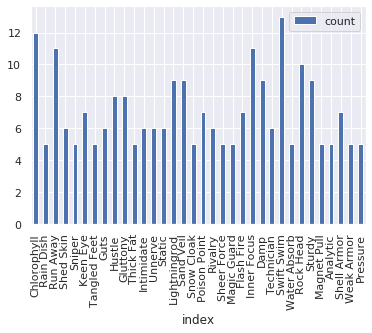

In [33]:
plt.close('all')
plt.figure()
df_abilities_counts[df_abilities_counts['count'] > 4].reset_index().plot.bar(x='index',
                                                                             y='count')

In [34]:
df[df['abilities'].str.contains('Gluttony')][['name', 'abilities', 'attack', 'defense', 'type1', 'type1']]

name                                          abilities  attack  \
18      Rattata  ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...      56   
19     Raticate  ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...      71   
68   Bellsprout                        ['Chlorophyll', 'Gluttony']      75   
69   Weepinbell                        ['Chlorophyll', 'Gluttony']      90   
70   Victreebel                        ['Chlorophyll', 'Gluttony']     105   
87       Grimer  ['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...      80   
88          Muk  ['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...     105   
142     Snorlax              ['Immunity', 'Thick Fat', 'Gluttony']     110   

     defense   type1   type1  
18        35  normal  normal  
19        70  normal  normal  
68        35   grass   grass  
69        50   grass   grass  
70        65   grass   grass  
87        50  poison  poison  
88        75  poison  poison  
142       65  normal  normal

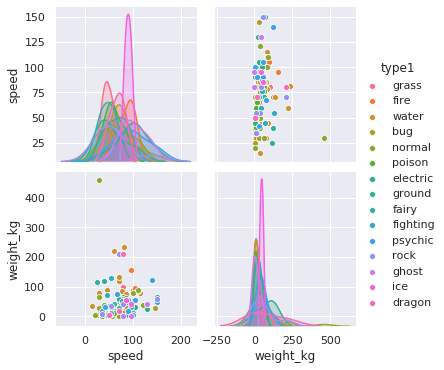

In [48]:
sns.pairplot(df, vars=["speed", "weight_kg"], hue="type1");